In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Baseline

In [2]:
baseline = pd.read_csv("/home/belerico/projects/sae-transfer-learning/eval/rs-post_all.csv")
baseline.rename(columns={'Unnamed: 0':'L'}, inplace=True)
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,262144.0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,262144.0
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,262144.0
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,262144.0
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,262144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,262144.0
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,262144.0
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,262144.0
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,262144.0


In [4]:
baseline[["ACT-Layer", "SAE-Layer"]] = baseline["L"].str.split("-", n=1, expand=True)
baseline["ACT-Layer"] = baseline["ACT-Layer"].astype(int)
baseline["SAE-Layer"] = baseline["SAE-Layer"].astype(int)
baseline = baseline.sort_values(by=["ACT-Layer", "SAE-Layer"])
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,262144.0,0,0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,262144.0,0,1
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,262144.0,0,2
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,262144.0,0,3
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,262144.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,262144.0,11,7
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,262144.0,11,8
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,262144.0,11,9
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,262144.0,11,10


[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9'),
 Text(0, 10.5, '10'),
 Text(0, 11.5, '11')]

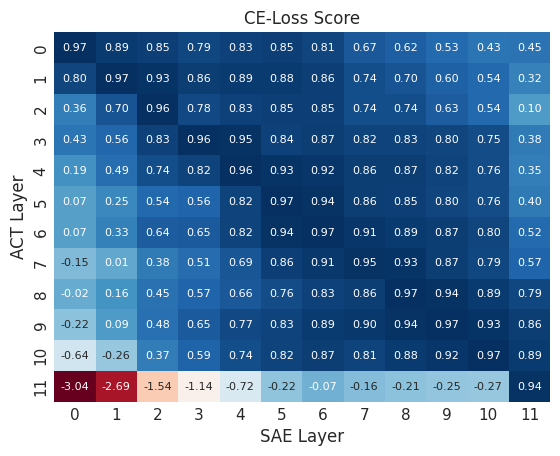

In [8]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
sns.set_theme()
ax = sns.heatmap(
    np.abs(baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12) - baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12)),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
    # vmax=3,
    # vmin=-3
)
ax.set_title("|CE-Loss w/ SAE - CE-Loss w/o SAE|")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)

In [ ]:
sns.set_theme()

# define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True, sharex=True)

ax=sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
    ax=axes[0],
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

ax = sns.heatmap(
    baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False,
    ax=axes[1],
)
ax.set_title("CE-Loss w/ SAE")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

ax = sns.heatmap(
    np.abs(
        baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)
        - baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12)
    ),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
    ax=axes[2],
    # vmax=3,
    # vmin=-3
)
ax.set_title("|CE-Loss w/ SAE - CE-Loss w/o SAE|")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

### Forward

In [ ]:
fwd = pd.read_csv("/home/belerico/projects/sae-transfer-learning/eval/rs-post_transfer_forward_100003840_all.csv")
fwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
fwd

In [ ]:
fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int)
fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
fwd

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    fwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Fwd CE-Loss Score \n $i$-th SAE Layer $\leftarrow$ $(i+1)$-th ACT Layer")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    np.abs(
        fwd[["ce_loss_with_sae"]].to_numpy().reshape(12, 11)
        - baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)[:, :-1]
    ),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

### Backward

In [ ]:
bwd = pd.read_csv("/home/belerico/projects/sae-transfer-learning/eval/rs-post_transfer_backward_100003840_all.csv")
bwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
bwd

In [ ]:
bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int)
bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
bwd

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    bwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score \n $i$-th SAE Layer $\leftarrow$ $(i-1)$-th ACT Layer")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
# TODO:
# - Add one plot for checkpoint
# - Plot/Show-table for L0 and L1